In [8]:
import pandas as pd
import numpy as np
import os
from io import StringIO
import re
import csv

from tabulate import tabulate


import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns

from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import plot_partial_dependence


%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 9]

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 400)

os.getcwd()



'/Users/lubagloukhov/Documents/Consulting/PiqueSolutions/JavaSE_202007/scripts'

In [9]:
mod_df = pd.read_csv('../data/output/mod_df.csv')  
catg_dummy_list = open('../data/output/catg_dummy_list.csv').read().splitlines()
cont_dummy_list = open('../data/output/cont_dummy_list.csv').read().splitlines()
dummy0_dummy_list = open('../data/output/dummy0_dummy_list.csv').read().splitlines()
exlc_dummy_list = open('../data/output/exlc_dummy_list.csv').read().splitlines()
map_df = pd.read_csv('../data/output/map_df.csv')

In [10]:

y0_list = ['Sat_Org_EclipseIDE',
 'Sat_Org_IntelliJIDE',
 'Sat_Org_JDeveloper',
 'Sat_Org_NetBeansIDE',
 'Sat_Org_RationalAppDev',
 'Sat_Org_VisualStudio',
 'Sat_Org_Other']
y1_list = ['Sat_Org_JavaSEAMC',
 'Sat_Org_JavaSEAMC_UsageLog',
 'Sat_Org_JavaSEDepRuleSet',
 'Sat_Org_JavaSEMSICustTools',
 'Sat_Org_JavaSEFlightRec']
y2_list = ['OJavaSESubscription_Elem_Sat_Org_ContinuedInvest',
 'OJavaSESubscription_Elem_Sat_Org_PatchesOlderV',
 'OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates',
 'OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates',
 'OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Sat_Org_Monitoring',
 'OJavaSESubscription_Elem_Sat_Org_MyOSupport',
 'OJavaSESubscription_Elem_Sat_Org_AccessCloud',
 'OJavaSESubscription_Elem_Sat_Org_FlexLicensing',
 'OJavaSESubscription_Elem_Sat_Org_LegacyJava',
 'OJavaSESubscription_Elem_Sat_Org_Other']
y3_list = ['OJavaSESubscription_Attr_Sat_CommMethods',
 'OJavaSESubscription_Attr_Sat_PhoneSupport',
 'OJavaSESubscription_Attr_Sat_SSKnowledge',
 'OJavaSESubscription_Attr_Sat_CoNeedsUnd',
 'OJavaSESubscription_Attr_Sat_TrainingQual',
 'OJavaSESubscription_Attr_Sat_RepsonseTime']

In [11]:
x0_list = ['Use_Org_EclipseIDE',
 'Use_Org_IntelliJIDE',
 'Use_Org_JDeveloper',
 'Use_Org_NetBeansIDE',
 'Use_Org_RationalAppDev',
 'Use_Org_VisualStudio',
 'Use_Org_Other']

x1_list = ['Use_Org_JavaSEAMC',
 'Use_Org_JavaSEAMC_UsageLog',
 'Use_Org_JavaSEDepRuleSet',
 'Use_Org_JavaSEMSICustTools',
 'Use_Org_JavaSEFlightRec']
x2_list = ['OJavaSESubscription_Elem_Imp_Org_ContinuedInvest',
 'OJavaSESubscription_Elem_Imp_Org_PatchesOlderV',
 'OJavaSESubscription_Elem_Imp_Org_JavaWebStartUpdates',
 'OJavaSESubscription_Elem_Imp_Org_DesktopManageUpdates',
 'OJavaSESubscription_Elem_Imp_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Imp_Org_Monitoring',
 'OJavaSESubscription_Elem_Imp_Org_MyOSupport',
 'OJavaSESubscription_Elem_Imp_Org_AccessCloud',
 'OJavaSESubscription_Elem_Imp_Org_FlexLicensing',
 'OJavaSESubscription_Elem_Imp_Org_LegacyJava',
 'OJavaSESubscription_Elem_Imp_Org_Other']
x3_list = ['OJavaSESubscription_Attr_Imp_CommMethods',
 'OJavaSESubscription_Attr_Imp_PhoneSupport',
 'OJavaSESubscription_Attr_Imp_SSKnowledge',
 'OJavaSESubscription_Attr_Imp_CoNeedsUnd',
 'OJavaSESubscription_Attr_Imp_TrainingQual',
 'OJavaSESubscription_Attr_Imp_RepsonseTime']

In [12]:
%run -i 'functions.py'

# Weighted

In [13]:
modw_df = mod_df.copy()

In [14]:
temp = mod_df[y0_list] * mod_df[x0_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y1_list] * mod_df[x1_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y2_list] * mod_df[x2_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y3_list] * mod_df[x3_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

print(len(y3_list)+len(y2_list)+len(y1_list)+len(y0_list))
print(modw_df.shape)

29
(228, 264)


In [15]:
y0w_list = [x+"_w" for x in y0_list]
y1w_list = [x+"_w" for x in y1_list]
y2w_list = [x+"_w" for x in y2_list]
y3w_list = [x+"_w" for x in y3_list]

In [16]:
print(catg_dummy_list) 
print()
print(cont_dummy_list )
print()
print(dummy0_dummy_list)

['Country_Code_AU', 'Country_Code_CA', 'Country_Code_CZ', 'Country_Code_DE', 'Country_Code_DK', 'Country_Code_GB', 'Country_Code_IN', 'Country_Code_IT', 'Country_Code_NL', 'Country_Code_QA', 'Country_Code_US', 'Country_Code_VN', 'Company_Industry_2', 'Company_Industry_5', 'Company_Industry_6', 'Company_Industry_7', 'Company_Industry_8', 'Company_Industry_9', 'Company_Industry_10', 'Company_Industry_11', 'Company_Industry_12', 'Company_Industry_14', 'Company_Industry_15', 'Company_Industry_16', 'Company_Industry_17', 'Company_Industry_18', 'Company_Industry_19', 'Company_Industry_20', 'Company_Industry_21', 'Company_Industry_22', 'Company_Industry_23', 'Company_Industry_25', 'Job_Title_1', 'Job_Title_2', 'Job_Title_3', 'Job_Title_4', 'Job_Title_5', 'Job_Title_8', 'Company_Revenue_1', 'Company_Revenue_2', 'Company_Revenue_3', 'Company_Revenue_4', 'OracleJavaSESubscription_Org_Duration_1', 'OracleJavaSESubscription_Org_Duration_2', 'OracleJavaSESubscription_Org_Duration_3', 'OracleJavaSES

# Describe Sentiment Metric

In [38]:
y2w_var = modw_df[y2w_list].mean(axis=1,skipna=True)
modw_df['y2w_var'] = y2w_var

y3w_var = modw_df[y3w_list].mean(axis=1,skipna=True)
modw_df['y3w_var'] = y3w_var

In [39]:
df1 = y3w_var.describe(include='all')

df1.loc['dtype'] = y3w_var.dtypes
df1.loc['size'] = len(y3w_var)
df1.loc['% count'] = y3w_var.isnull().mean()

print (df1)

count            217
mean         53.3302
std          22.6382
min                0
25%            36.75
50%          53.1667
75%             69.5
max              100
dtype        float64
size             228
% count    0.0482456
dtype: object


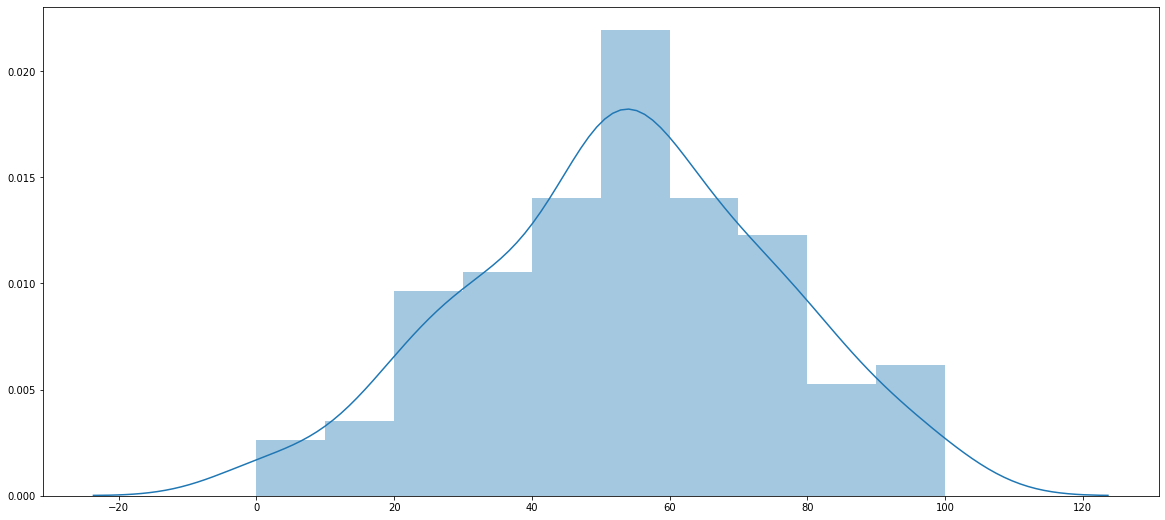

In [40]:
sns.distplot(y3w_var.fillna(y3w_var.mean()))

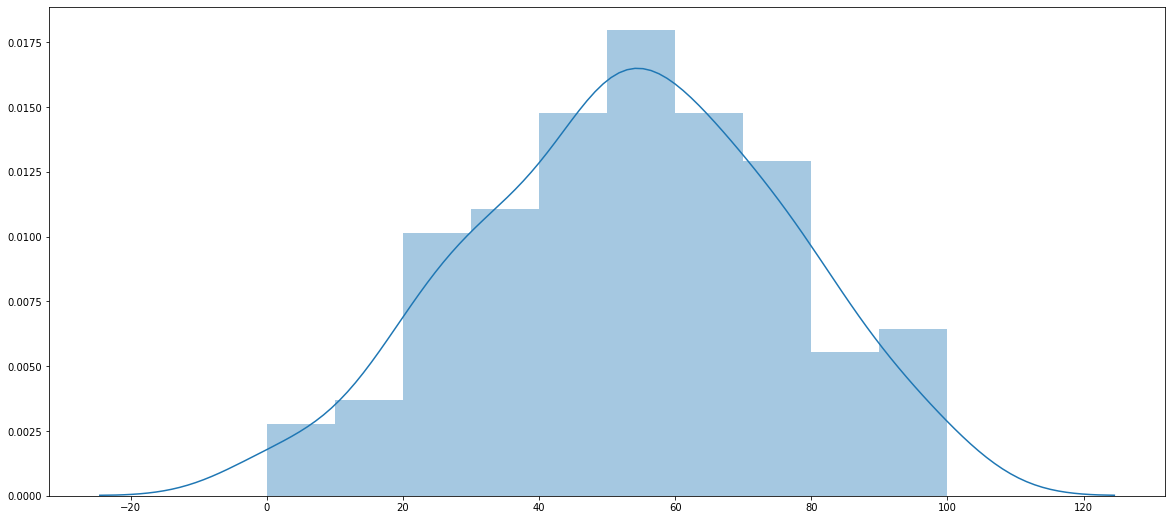

In [41]:
sns.distplot(y3w_var.dropna())

# y3w w/ Continuous Variables

In [42]:
y_list_list = [[y1w_list + y2w_list + y3w_list], 
              [y1w_list + y2w_list], 
              [y1w_list + y3w_list], 
              [y2w_list + y3w_list],
               y1w_list, 
               y2w_list,
               y3w_list]
y_list_names = ['y123w', 'y12w','y13w','y23w','y1w','y2w','y3w']

i=5

X_drop = [[y1_list + y2_list + y3_list + x1_list + x2_list + x3_list ], 
          [y1_list + y2_list + x1_list + x2_list], 
          [y1_list + y3_list + x1_list + x3_list], 
          [y2_list + y3_list + x2_list + x3_list],
           y1_list + x1_list,  
           y2_list + x2_list,
           y3_list + x3_list]

X_list = cont_dummy_list

y_list = y_list_list[i]
    
    
y_funct = 'mean'
print(y_list_names[i])

clf,MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2, feature_importances, X_drop  = rf_pipe (
               mod_df = modw_df, 
               y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
               X_list = X_list,
               y_funct = y_funct, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
               X_drop = X_drop[i], # list of additional predictors to drop 
               imp_filename = '../data/output/temp.csv') #% (y_list_names[i],y_funct))

y2w


In [43]:
accuracy

73.46203915488653

In [44]:
varimp_df = pd.DataFrame(feature_importances)
varimp_top10 = varimp_df[0].values[0:10]

varimp_df = varimp_df.merge(map_df, left_on=0,right_on='new')
varimp_df.columns = ['var','imp','var_2','Q']
varimp_df = varimp_df[['var','Q','imp']]
varimp_df[['Q','imp']][0:10]

,Q,imp
0,"Knowledge of support staff Importance (0-10)[ , ]",0.09
1,"Methods of communication Importance (0-10)[ , ]",0.08
2,"Quality of phone support Importance (0-10)[ , ]",0.06
3,"Response time to support requests Importance (0-10)[ , ]",0.06
4,Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”. Total cost of ownership,0.06
5,Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”. Price/Performance Ratio,0.04
6,Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”. Innovation potential,0.04
7,"Quality of training provided to your staff Importance (0-10)[ , ]",0.03
8,Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”. Ability to contribute to ongoing innovation of Java platform,0.03
9,"Eclipse IDE Level of satisfaction (0-10)[ , ]",0.02


In [45]:
X = modw_df.drop(y_list, axis=1, errors='ignore')
X = X[X_list]
X = X.drop(y2_list  +x2_list ,
           axis=1, errors='ignore')
X = X.fillna(X.mean())
X_train, X_test = train_test_split(X, random_state=0)

In [46]:
varimp_top10

array(['OJavaSESubscription_Attr_Imp_SSKnowledge',
       'OJavaSESubscription_Attr_Imp_CommMethods',
       'OJavaSESubscription_Attr_Imp_PhoneSupport',
       'OJavaSESubscription_Attr_Imp_RepsonseTime',
       'OJavaSESubscription_OrgPurch_Imp_TotalCost',
       'OJavaSESubscription_OrgPurch_Imp_PrPerRatio',
       'OJavaSESubscription_OrgPurch_Imp_InnovationPotential',
       'OJavaSESubscription_Attr_Imp_TrainingQual',
       'OJavaSESubscription_OrgPurch_Imp_InnovationContribution',
       'Sat_Org_EclipseIDE'], dtype=object)

In [47]:
tuple(varimp_top10[0:2])

('OJavaSESubscription_Attr_Imp_SSKnowledge',
 'OJavaSESubscription_Attr_Imp_CommMethods')

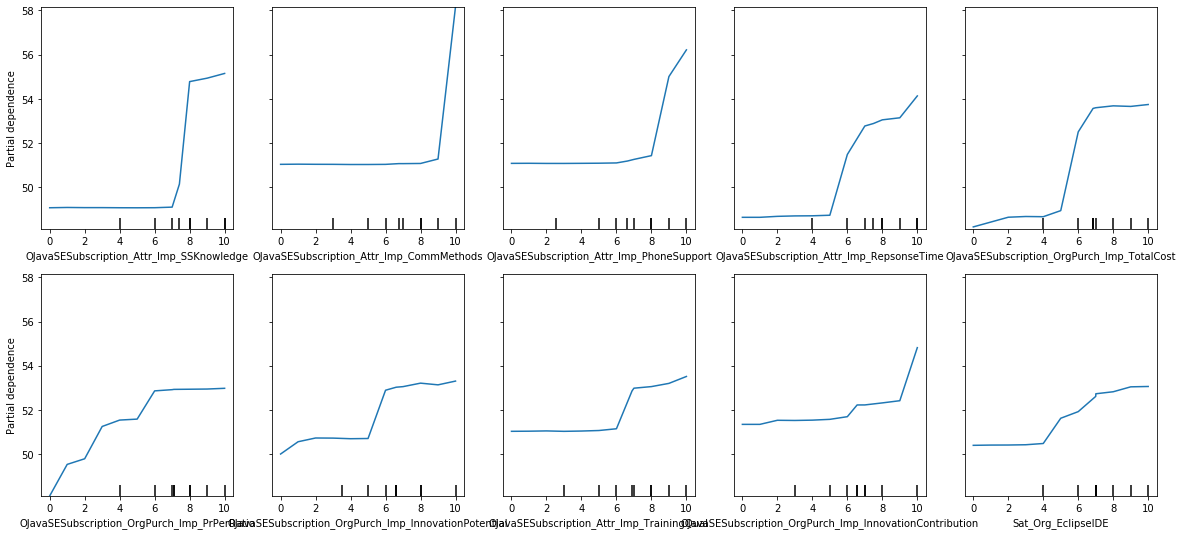

In [48]:
plot_partial_dependence(clf, X_train, varimp_top10, 
                        n_cols=5, grid_resolution=100)

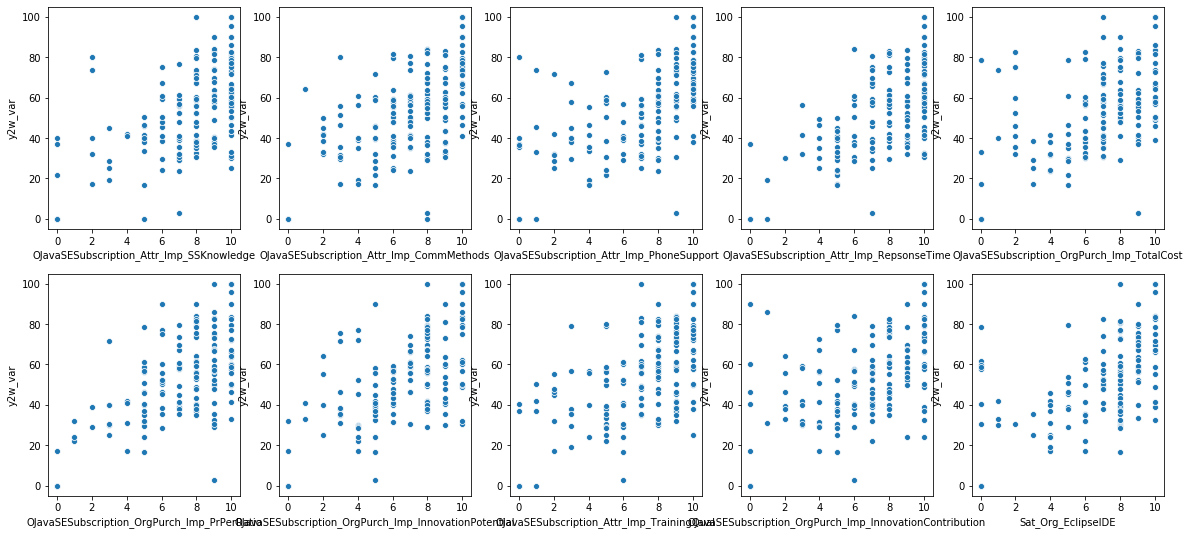

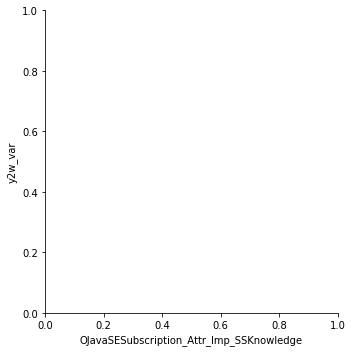

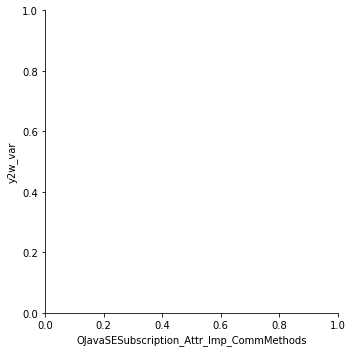

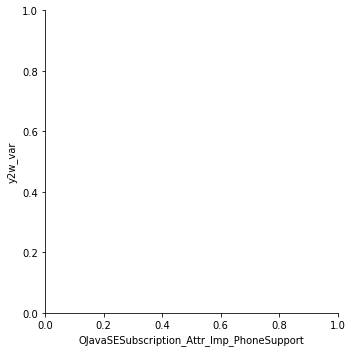

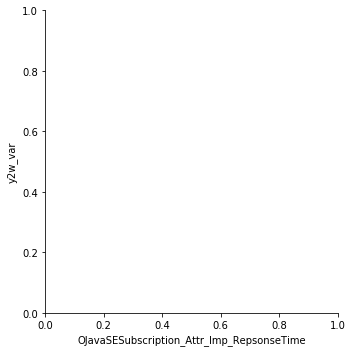

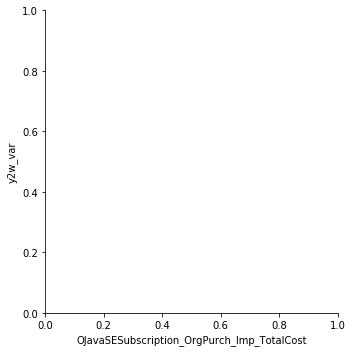

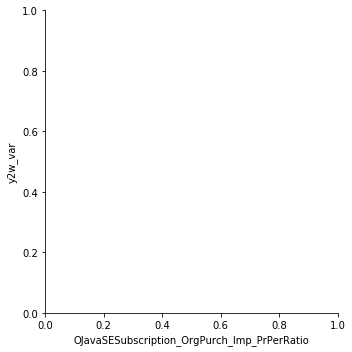

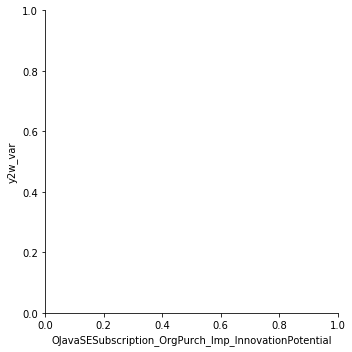

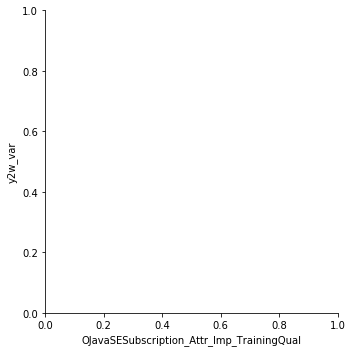

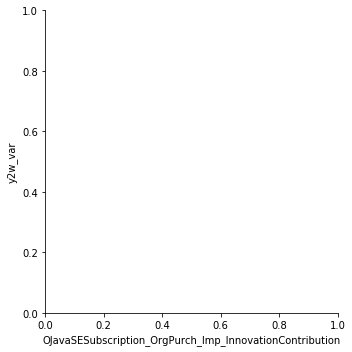

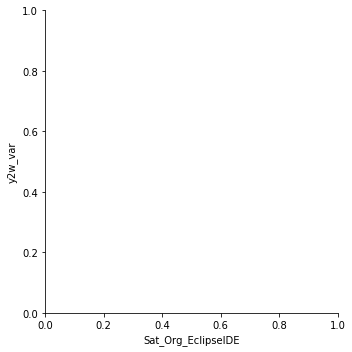

In [49]:
fig, axs = plt.subplots(ncols=5, nrows=2)
i=0
axli = axs.flatten()
for v in varimp_top10:
    sns.relplot(x=v, y="y2w_var", data=modw_df, ax=axli[i])
    i=i+1

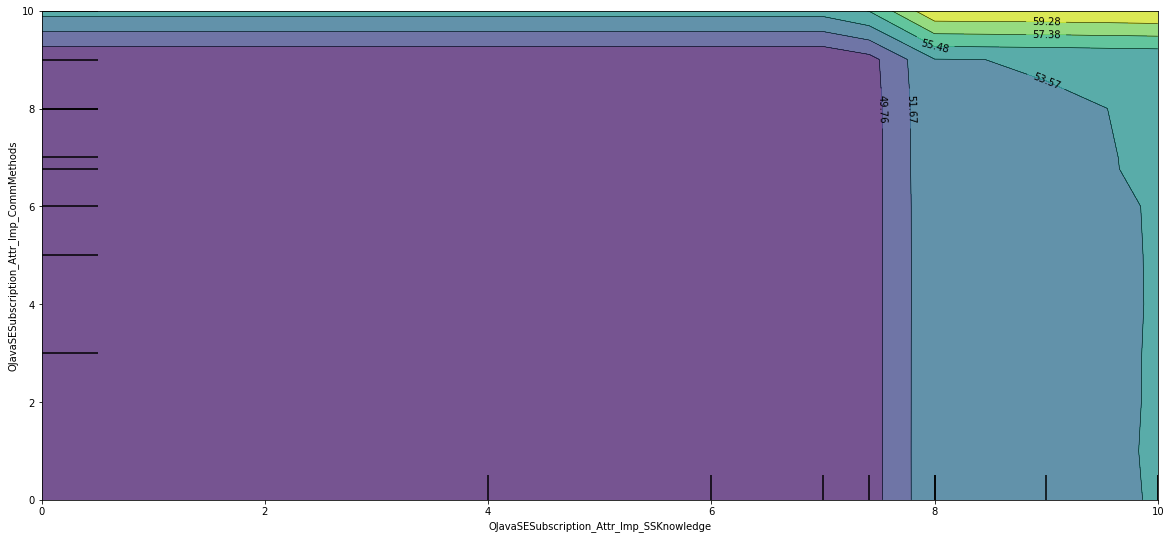

In [50]:
plot_partial_dependence(clf, X_train, [tuple(varimp_top10[0:2])])

In [51]:
# Examine each  driver... look for low use, low importance, low satisfation
print(varimp_top10)

['OJavaSESubscription_Attr_Imp_SSKnowledge'
 'OJavaSESubscription_Attr_Imp_CommMethods'
 'OJavaSESubscription_Attr_Imp_PhoneSupport'
 'OJavaSESubscription_Attr_Imp_RepsonseTime'
 'OJavaSESubscription_OrgPurch_Imp_TotalCost'
 'OJavaSESubscription_OrgPurch_Imp_PrPerRatio'
 'OJavaSESubscription_OrgPurch_Imp_InnovationPotential'
 'OJavaSESubscription_Attr_Imp_TrainingQual'
 'OJavaSESubscription_OrgPurch_Imp_InnovationContribution'
 'Sat_Org_EclipseIDE']


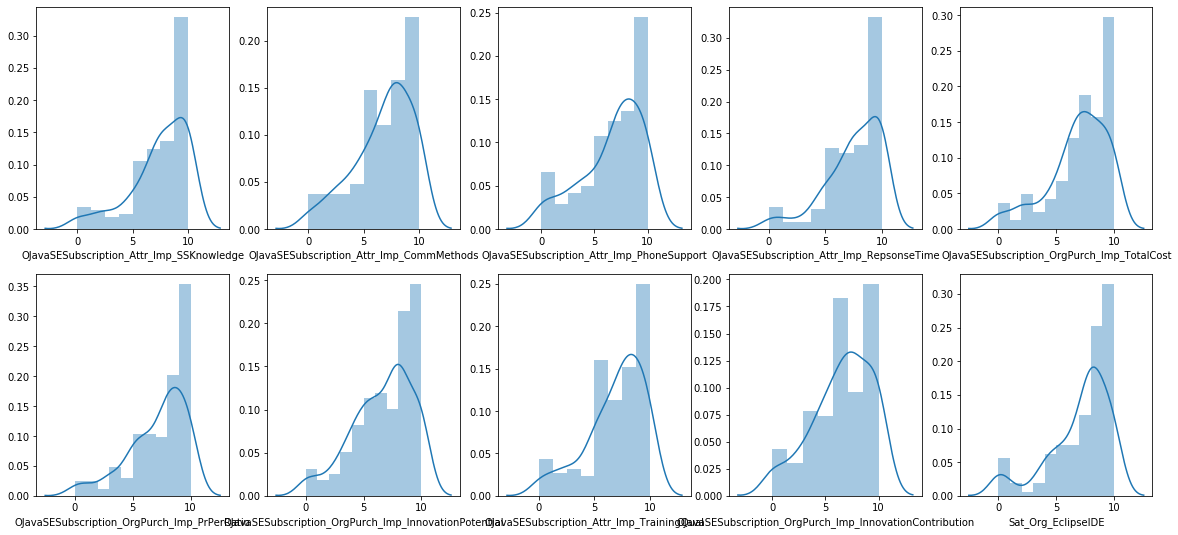

In [52]:
fig, axs = plt.subplots(ncols=5, nrows=2)
i=0
axli = axs.flatten()
for v in varimp_top10:
    sns.distplot(mod_df[v].dropna(), ax=axli[i])
    i=i+1

# y2w w/ Categ Variables

In [53]:
catg_dummy_list+ dummy0_dummy_list

['Country_Code_AU',
 'Country_Code_CA',
 'Country_Code_CZ',
 'Country_Code_DE',
 'Country_Code_DK',
 'Country_Code_GB',
 'Country_Code_IN',
 'Country_Code_IT',
 'Country_Code_NL',
 'Country_Code_QA',
 'Country_Code_US',
 'Country_Code_VN',
 'Company_Industry_2',
 'Company_Industry_5',
 'Company_Industry_6',
 'Company_Industry_7',
 'Company_Industry_8',
 'Company_Industry_9',
 'Company_Industry_10',
 'Company_Industry_11',
 'Company_Industry_12',
 'Company_Industry_14',
 'Company_Industry_15',
 'Company_Industry_16',
 'Company_Industry_17',
 'Company_Industry_18',
 'Company_Industry_19',
 'Company_Industry_20',
 'Company_Industry_21',
 'Company_Industry_22',
 'Company_Industry_23',
 'Company_Industry_25',
 'Job_Title_1',
 'Job_Title_2',
 'Job_Title_3',
 'Job_Title_4',
 'Job_Title_5',
 'Job_Title_8',
 'Company_Revenue_1',
 'Company_Revenue_2',
 'Company_Revenue_3',
 'Company_Revenue_4',
 'OracleJavaSESubscription_Org_Duration_1',
 'OracleJavaSESubscription_Org_Duration_2',
 'OracleJavaSE

In [60]:
y_list_list = [[y1w_list + y2w_list + y3w_list], 
              [y1w_list + y2w_list], 
              [y1w_list + y3w_list], 
              [y2w_list + y3w_list],
               y1w_list, 
               y2w_list,
               y3w_list]
y_list_names = ['y123w', 'y12w','y13w','y23w','y1w','y2w','y3w']

i=5

X_drop = [[y1_list + y2_list + y3_list + x1_list + x2_list + x3_list ], 
          [y1_list + y2_list + x1_list + x2_list], 
          [y1_list + y3_list + x1_list + x3_list], 
          [y2_list + y3_list + x2_list + x3_list],
           y1_list + x1_list,  
           y2_list + x2_list,
           y3_list + x3_list]

X_list = catg_dummy_list+ dummy0_dummy_list

y_list = y_list_list[i]
    
    
y_funct = 'mean'
print(y_list_names[i])

clf,MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2, feature_importances, X_drop  = rf_pipe (
               mod_df = modw_df, 
               y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
               X_list = X_list,
               y_funct = y_funct, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
               X_drop = X_drop[i], # list of additional predictors to drop 
               imp_filename = '../data/output/temp.csv') #% (y_list_names[i],y_funct))

y2w


In [61]:
accuracy

64.46850090661722

In [62]:
varimp_df = pd.DataFrame(feature_importances).sort_values(1,ascending=False)
varimp_top10 = varimp_df[0].values[0:10]

In [63]:
varimp_top10

array(['Country_Code_CA', 'Job_Title_2',
       'OracleJavaSESubscription_Org_Duration_2',
       'OracleJavaSESubscription_Ind_Role_3',
       'OJavaSESubscription_Alts_Top3_AppSecurity', 'Company_Industry_9',
       'OJavaSESubscription_Alts_Top3_EasierUse',
       'JavaSESub_PrePurchasePeriod_3', 'JavaSESub_PrePurchasePeriod_4',
       'OJavaSESubscription_Alts_Top3_CostManagement'], dtype=object)

In [64]:
varimp_df = pd.DataFrame(feature_importances).sort_values(1,ascending=False)
varimp_top10 = varimp_df[0].values[0:10]
varimp_df = varimp_df.merge(map_df, left_on=0,right_on='new', how='left')
varimp_df.columns = ['var','imp','var_2','Q']
varimp_df['var3'] = ["_".join(t[:-1]) for t in varimp_df['var'].str.split('_')]
varimp_df['var4'] = [t[-1] for t in varimp_df['var'].str.split('_')]
varimp_df = varimp_df.merge(map_df, left_on='var3',right_on='new', how='left')
varimp_df.org = varimp_df.org + " " + varimp_df.var4
varimp_df['Q'] = varimp_df['Q'].fillna(varimp_df['org'])
varimp_df[['Q','imp']].sort_values('imp',ascending=False)[0:10]

,Q,imp
0,Country Code CA,0.03
2,How long has your organization been using Oracle Java SE Subscription for managing your Java applications? 2,0.03
3,Which of the following statements most closely describes your role in the selection and use of Oracle Java SE Subscription? (Select one) 3,0.03
4,"From the list below, please check the top 3 reasons for which you would consider alternatives to Oracle Java SE Subscription. [Greater application security]",0.03
5,Which one of the below best describes your company’s industry grouping? 9,0.03
1,What is your job title? 2,0.03
26,Which one of the below best describes your company’s industry grouping? 20,0.02
21,Which one of the below best describes your company’s industry grouping? 2,0.02
22,Which of the following statements most closely describes your role in the selection and use of Oracle Java SE Subscription? (Select one) 1,0.02
24,Which one of the below best describes your company’s industry grouping? 8,0.02


In [65]:
X = modw_df.drop(y_list, axis=1, errors='ignore')
X = X[X_list]
X = X.drop(y1_list + y2_list + y3_list + x1_list + x2_list + x3_list,
           axis=1, errors='ignore')
X = X.fillna(X.mean())
X_train, X_test = train_test_split(X, random_state=0)

In [66]:
varimp_top10

array(['Country_Code_CA', 'Job_Title_2',
       'OracleJavaSESubscription_Org_Duration_2',
       'OracleJavaSESubscription_Ind_Role_3',
       'OJavaSESubscription_Alts_Top3_AppSecurity', 'Company_Industry_9',
       'OJavaSESubscription_Alts_Top3_EasierUse',
       'JavaSESub_PrePurchasePeriod_3', 'JavaSESub_PrePurchasePeriod_4',
       'OJavaSESubscription_Alts_Top3_CostManagement'], dtype=object)

In [67]:
tuple(varimp_top10[0:2])

('Country_Code_CA', 'Job_Title_2')

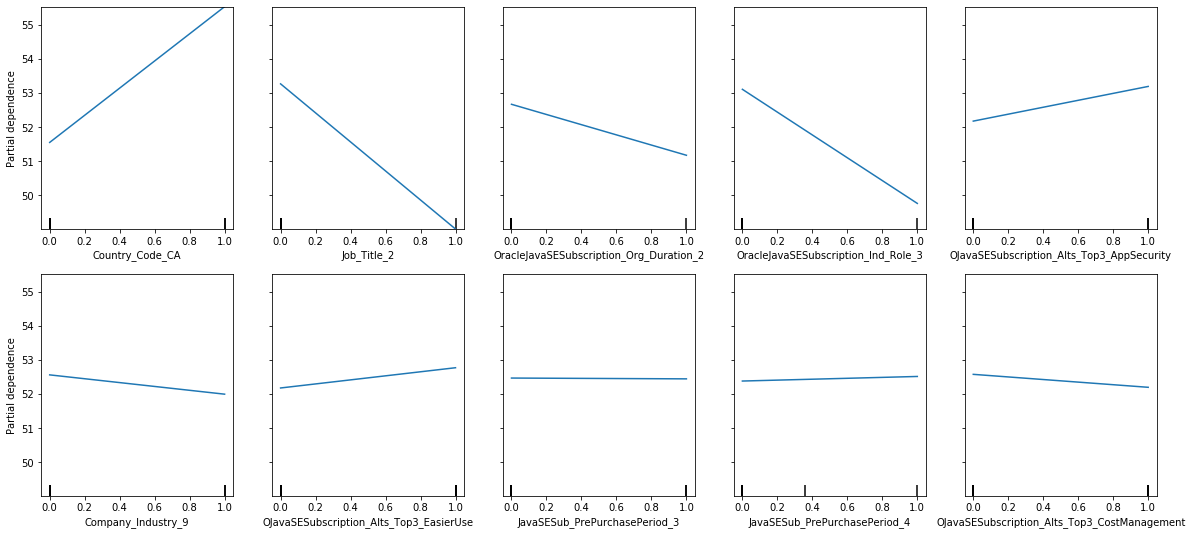

In [68]:
plot_partial_dependence(clf, X_train, varimp_top10, 
                        n_cols=5, grid_resolution=100)

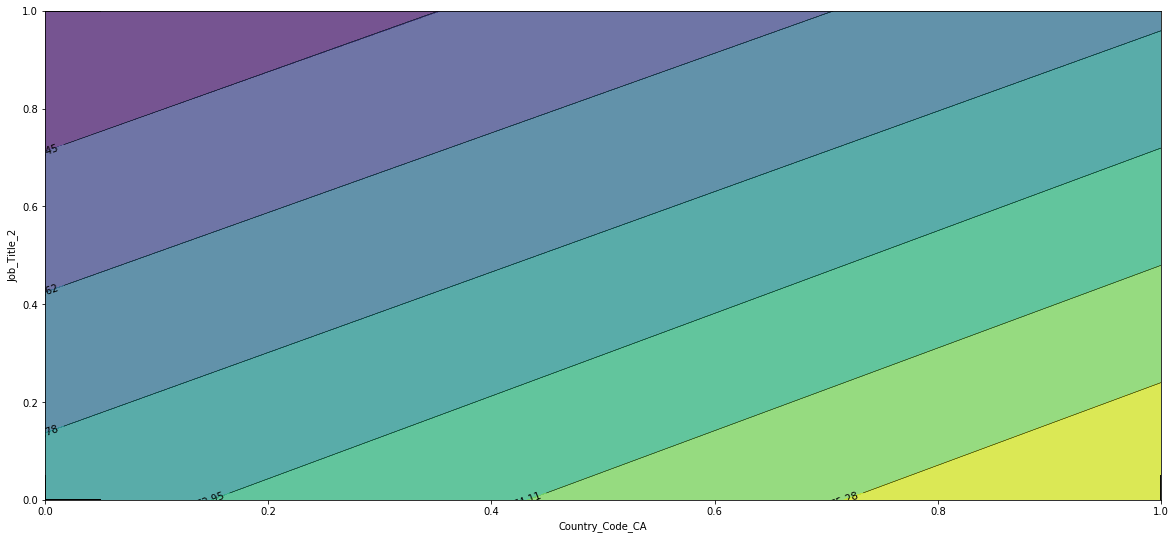

In [69]:
plot_partial_dependence(clf, X_train, [tuple(varimp_top10[0:2])])

In [70]:
# Examine each  driver... look for low use, low importance, low satisfation
print(varimp_top10)

['Country_Code_CA' 'Job_Title_2' 'OracleJavaSESubscription_Org_Duration_2'
 'OracleJavaSESubscription_Ind_Role_3'
 'OJavaSESubscription_Alts_Top3_AppSecurity' 'Company_Industry_9'
 'OJavaSESubscription_Alts_Top3_EasierUse' 'JavaSESub_PrePurchasePeriod_3'
 'JavaSESub_PrePurchasePeriod_4'
 'OJavaSESubscription_Alts_Top3_CostManagement']


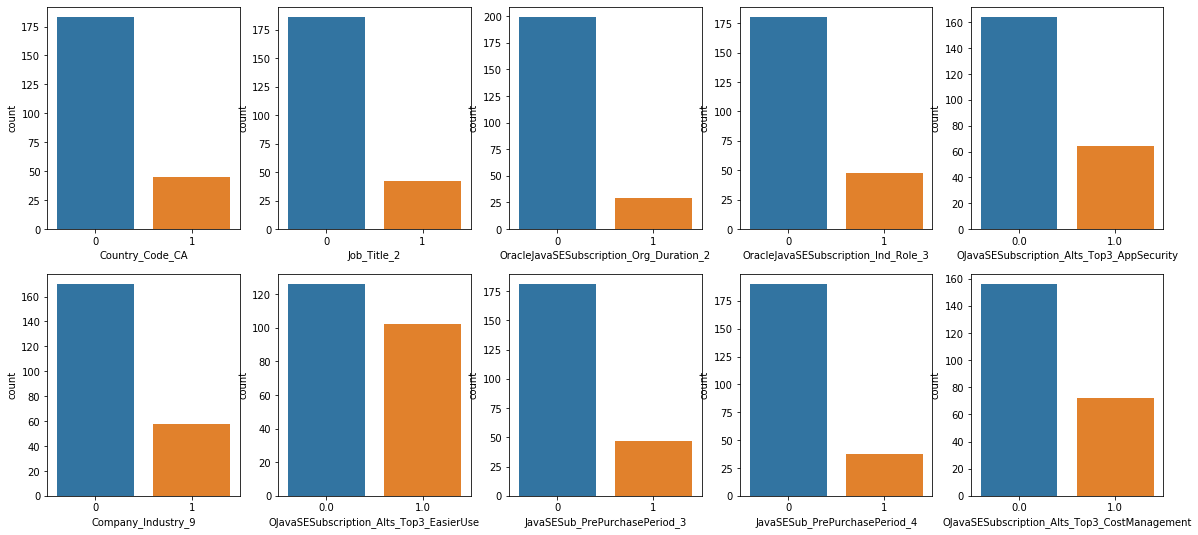

In [71]:
fig, axs = plt.subplots(ncols=5, nrows=2)
i=0
axli = axs.flatten()
for v in varimp_top10:
    sns.countplot(mod_df[v].dropna(), ax=axli[i])
    i=i+1

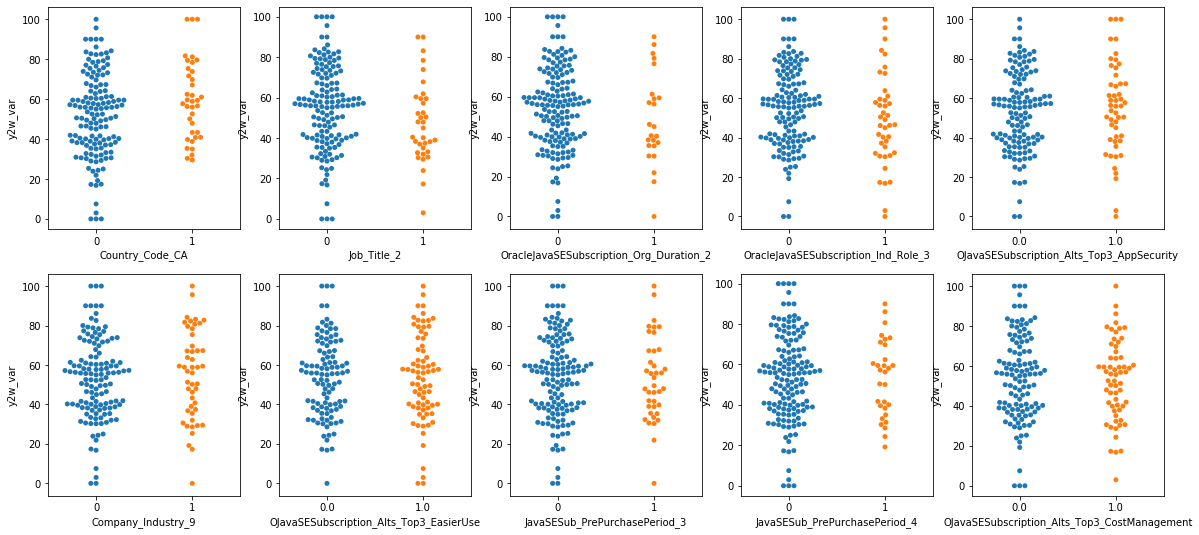

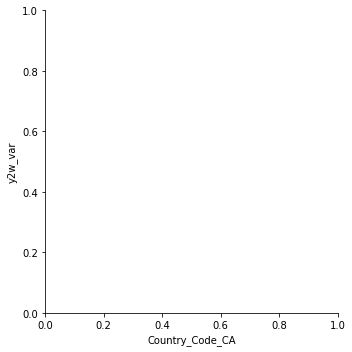

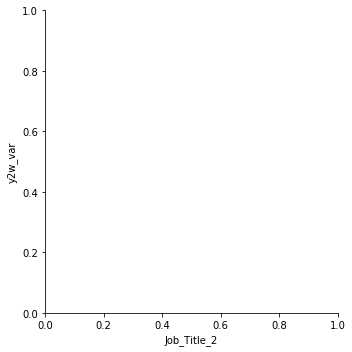

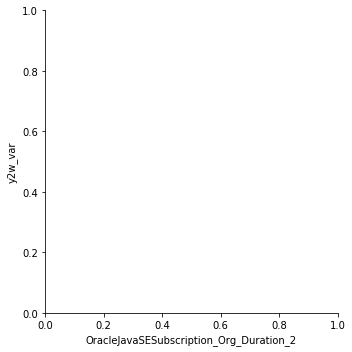

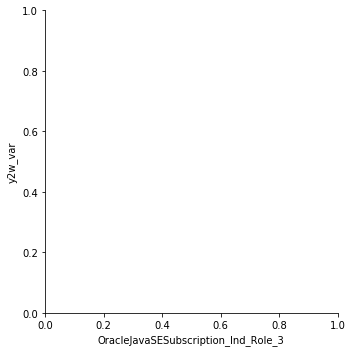

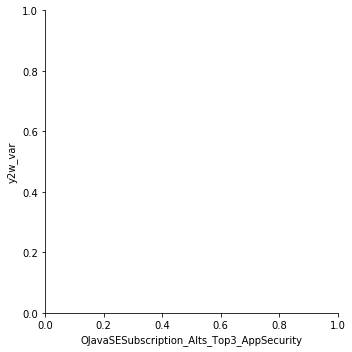

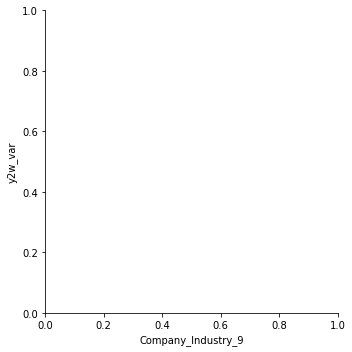

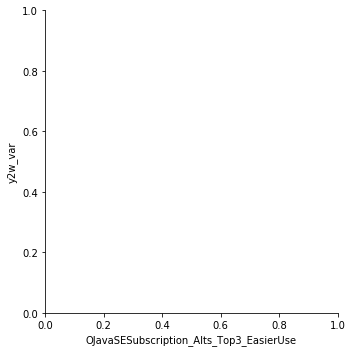

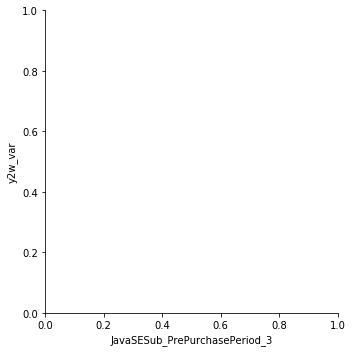

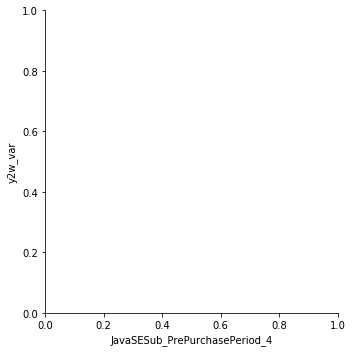

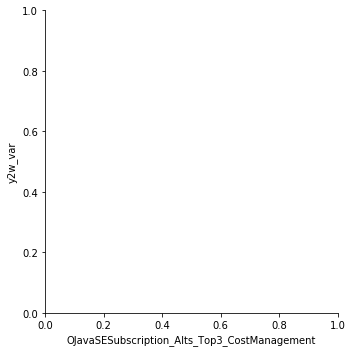

In [73]:
fig, axs = plt.subplots(ncols=5, nrows=2)
i=0
axli = axs.flatten()
for v in varimp_top10:
    sns.catplot(x=v, y="y2w_var", kind="swarm", 
                data=modw_df, ax=axli[i])
    i=i+1
